# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [64]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [65]:
df = pd.read_csv('lab12_files/US_Baby_Names_right.csv')

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [66]:
baby_names = df
baby_names

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [67]:
baby_names[:10]

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [68]:
baby_names.drop(columns=['Unnamed: 0', 'Id'], inplace=True)

In [69]:
baby_names

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [71]:
gender_counts = baby_names['Gender'].value_counts()
print(gender_counts)

#więcej kobiet niż mężczyzn

Gender
F    558846
M    457549
Name: count, dtype: int64


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [81]:
name_grouping = (
    baby_names
    .groupby('Name')['Count']
    .sum()
    .sort_values(ascending=False)[:10])

name_grouping

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
William     197894
Joshua      191551
Sophia      191446
Daniel      191440
Emily       190318
Name: Count, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Emma'),
  Text(1, 0, 'Isabella'),
  Text(2, 0, 'Sophia'),
  Text(3, 0, 'Emily'),
  Text(4, 0, 'Olivia'),
  Text(5, 0, 'Ava'),
  Text(6, 0, 'Madison'),
  Text(7, 0, 'Abigail'),
  Text(8, 0, 'Elizabeth'),
  Text(9, 0, 'Mia')])

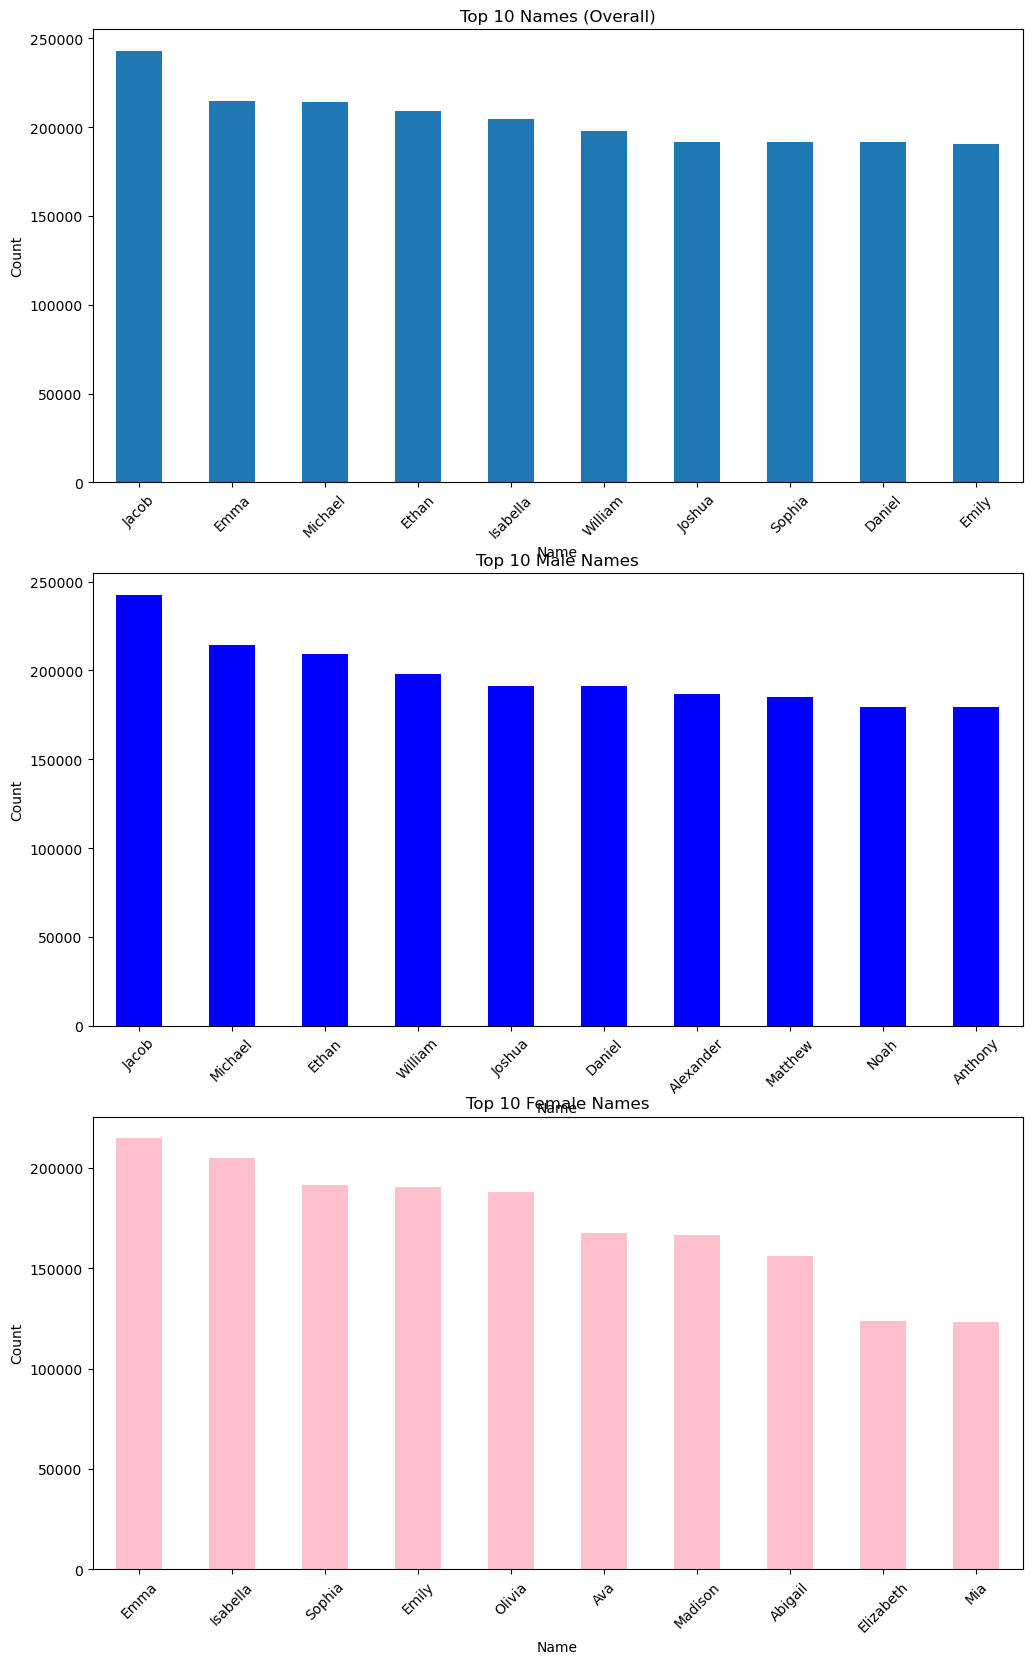

In [ ]:
import matplotlib.pyplot as plt

male_grouping = (
    baby_names[baby_names['Gender'] == 'M']
    .groupby('Name')['Count']
    .sum()
    .sort_values(ascending=False)[:10])



female_grouping = (
    baby_names[baby_names['Gender'] == 'F']
    .groupby('Name')['Count']
    .sum()
    .sort_values(ascending=False)[:10])


plt.figure(figsize=(12, 20))



plt.subplot(3, 1, 1)

name_grouping.plot(kind='bar', title="Top 10 Names (Overall)")

plt.ylabel("Count")

plt.xticks(rotation=45)




plt.subplot(3, 1, 2)

male_grouping.plot(kind='bar', color='blue', title="Top 10 Male Names")

plt.ylabel("Count")

plt.xticks(rotation=45)




plt.subplot(3, 1, 3)

female_grouping.plot(kind='bar', color='pink', title="Top 10 Female Names")

plt.ylabel("Count")

plt.xticks(rotation=45)


Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [ ]:
unique_names = baby_names['Name'].unique()
len(unique_names)

array(['Emma', 'Madison', 'Hannah', ..., 'Braun', 'Evrett', 'Coalton'],
      dtype=object)

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [112]:
import numpy as np

probability = baby_names['Count'] / baby_names['Count'].sum()

def name_generator(n=1):
    return np.random.choice(
        baby_names['Name'], size=n, p=probability
    )

generated_names = name_generator(5)
print(generated_names)

['Jeremiah' 'Carter' 'Joseph' 'Brandon' 'Preston']


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [126]:
most_frequent_name  = (baby_names
    .groupby('Name')['Count']
    .sum()
    .sort_values(ascending=False)).index[0]

mean_count = baby_names['Count'].mean()
median_count = baby_names['Count'].median()
std_dev_count = baby_names['Count'].std()

print("Most Frequent Name:", most_frequent_name)
print("Mean Occurrence:", mean_count)
print("Median Occurrence:", median_count)
print("Standard Deviation of Occurrences:", std_dev_count)

Most Frequent Name: Jacob
Mean Occurrence: 34.85012421351935
Median Occurrence: 11.0
Standard Deviation of Occurrences: 97.39734648625934


## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.